# Problem Statement

The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the csv file
data = pd.read_csv('car_age_price.csv')

In [3]:
#generating the first five rows of the data
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# Understanding the structure of data

In [4]:
#Shape of the data
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


The given data has only 2 columns and both are numerical columns.

In [6]:
#Statistical summary of data
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


From the description we get to know that:
Maximum price of the car reported till 2020 is Rs.755000 and minimum is Rs.300000

In [7]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [8]:
#Checking the null values
data.isnull().sum()

Year     0
Price    0
dtype: int64

There are no null values present

In [9]:
#Checking the  number of unique values
data['Price'].nunique()

35

In [10]:
data['Year'].nunique()

8

# Visualizing the data

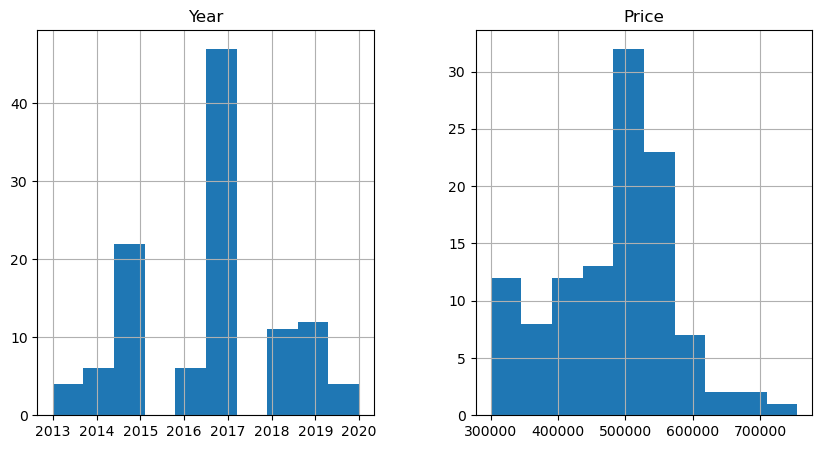

In [11]:
#Frequency distribution of year and price
freqgraph = data
freqgraph.hist(figsize = (10,5))
plt.show()

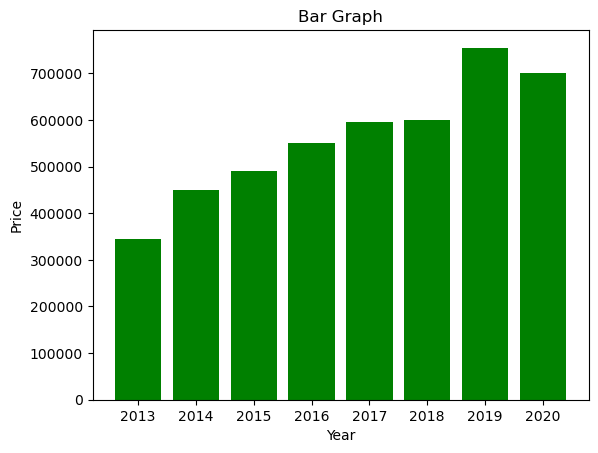

In [12]:
X = list(data.iloc[:, 0])
Y = list(data.iloc[:, 1])
plt.bar(X, Y, color='green')
plt.title('Bar Graph')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

From the bar graph the maximum price of second-hand Hyundai grand i10 car has come in the year 2019.

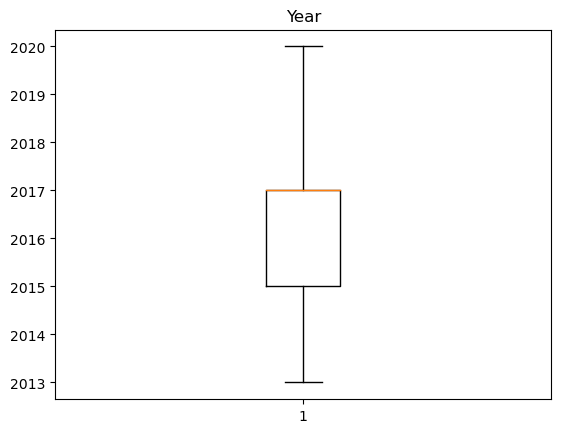

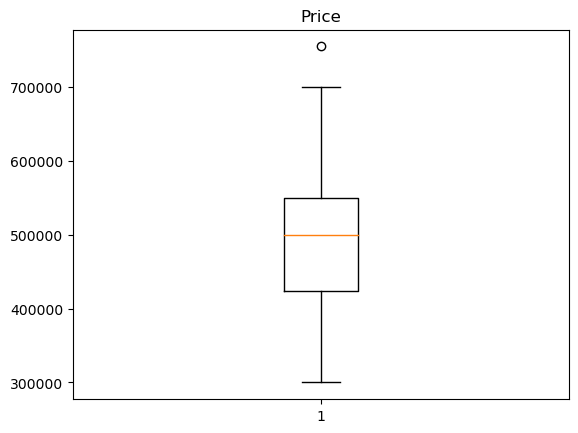

In [13]:
#checking outliers
for i in data:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

There is one outlier in the second boxplot 'Price' and we have to remove it.

In [14]:
#Finding first,second and third quartile
Q1 = np.percentile(data['Price'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['Price'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['Price'],75,interpolation = 'midpoint')

In [15]:
#printing Q1,Q2 and Q3
print(Q1)
print(Q2)
print(Q3)

422500.0
500000.0
550000.0


In [16]:
#finding the median of price column
data['Price'].median()

500000.0

In [17]:
#finding the Inter Quartile Range(IQR)
IQR = Q3 - Q1
IQR

127500.0

In [18]:
low_limit =  Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [19]:
#finding outlier using for loop
outlier = []
for x in data['Price']:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)

In [20]:
outlier

[755000]

In [21]:
#finding the index of the outlier
ind1 = data['Price']<low_limit
data.loc[ind1].index

Int64Index([], dtype='int64')

In [22]:
ind1 = data['Price']>upper_limit
data.loc[ind1].index

Int64Index([1], dtype='int64')

In [23]:
data.drop([1], inplace = True)

<AxesSubplot:>

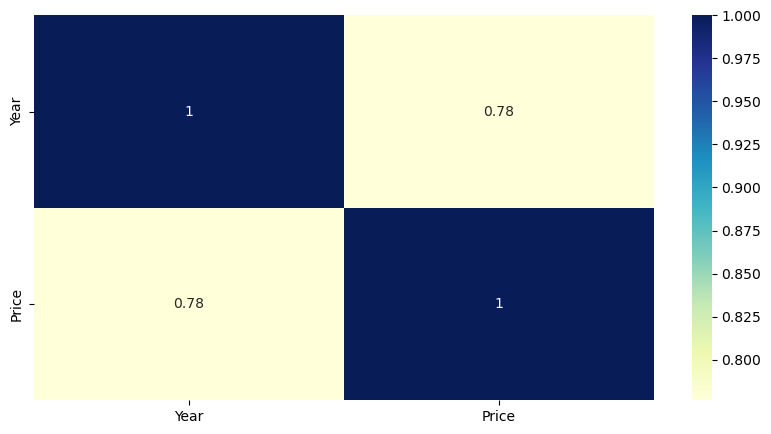

In [24]:
#Checking the correlation between the two variables
corrmatrix = data.corr()
plt.subplots(figsize = (10,5))
sns.heatmap(corrmatrix,annot = True,cmap ='YlGnBu')

Since there are only two columns and both are positively correlated, we are not going to drop any columns for prediction.

# Model Training



# 1. Linear Regression

In [25]:
#Splitting the data 
y = data['Price']                   # x is the dependent variable to be predicted
x = data.drop(['Price'], axis =1)   #y is the independent variable

In [26]:
#define Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#transforming
scaled = scaler.fit_transform(x)

In [27]:
#importing the sklearn library for splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled,y,test_size = 0.2,random_state =42)

In [28]:
#importing linear regression algorithm
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [29]:
#fitting and predicting
model =lr.fit(x_train,y_train)
y_pred = model.predict(x_test)

Comparing actual and predicted values

In [30]:
result = pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_pred})
result

,Actual Price,Predicted Price
79,400000,418695.083040
11,500000,541198.432885
5,350000,418695.083040
85,320000,418695.083040
65,495000,500363.982937
69,300000,418695.083040
31,550000,500363.982937
46,500000,582032.882834
97,640000,622867.332782
12,500000,500363.982937


Performance Measures

In [31]:
#importing metrics for evaluation
from sklearn.metrics import r2_score,mean_absolute_percentage_error
print('R2 Score is :',r2_score(y_test,y_pred))
print('Error Percentage is :',mean_absolute_percentage_error(y_test,y_pred))
print('Accuracy is:',1-mean_absolute_percentage_error(y_test,y_pred))

R2 Score is : 0.7087665874512095
Error Percentage is : 0.09079971042576739
Accuracy is: 0.9092002895742326


Plotting actual vs predicted price

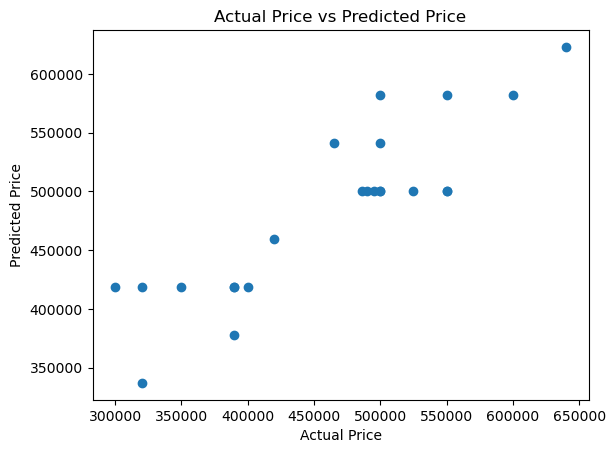

In [32]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

# 2. Lasso Regression

In [33]:
#importing lasso regression from sklearn library
from sklearn.linear_model import Lasso
las_regr_model=Lasso()

In [34]:
#Defining lasso
las_regr_model.fit(x_test,y_test)

Lasso()

In [35]:
#predicting values
y2_pred =las_regr_model.predict(x_test)

Performance Measures

In [36]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
print('R2 Score is :',r2_score(y_test,y2_pred))
print('Error Percentage is :',mean_absolute_percentage_error(y_test,y2_pred))
print('Accuracy is:',1-mean_absolute_percentage_error(y_test,y2_pred))

R2 Score is : 0.7782020900733806
Error Percentage is : 0.07873270231312374
Accuracy is: 0.9212672976868763


Plotting actual vs predicted price

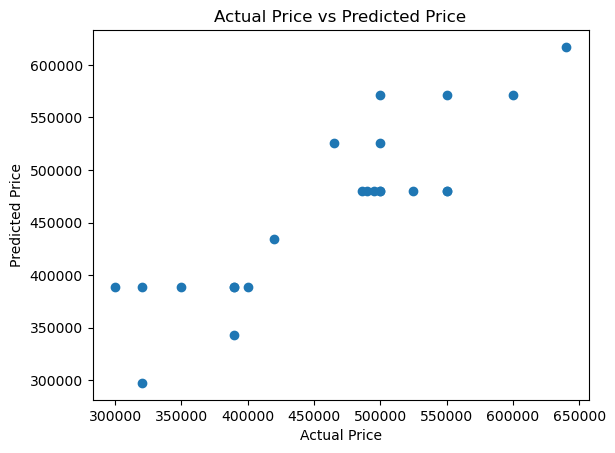

In [37]:
plt.scatter(y_test,y2_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

# CONCLUSION

1. For Linear Regression, we got 90.92% accuracy. The r2 score is 0.708 and the mean absolute percentage error is 9.0%

2. For Lasso Regression, we got 92.12% accuracy. The r2 score is 0.778 and the mean absolute percentage error is 7.8%


   So we can conclude that lasso regression performs better and can be used to predict the price of the car for the year 2022.
   